## Classification

* Classification, is an area of *supervised learning* that addresses the problem of how to systematically assign unlabeled (**classes** unknown) novel data to their labels (**classes** or groups or types) by using knowledge of their **features** (characteristics or attributes) that are obtained from observation and/or measurement.
* A classifier algorithm is a specific technique or method for performing classification.
* To learn to classify, the classifier algorithm first uses labeled (classes are known) training data to train a model (i.e., fit parameters), and then it uses a function known as its classification rule (or for short, the **classifier**) to assign a label to each new data point given the feature values.
* A simple measure of classification performance is **accuracy**, that is what fraction of the test data is labeled accurately. 

The automated checkout problem 

![](../images/pepperfeature.png)
![](../images/peppertest.png)

## The intuitive importance of Classification
* In conventional statistics courses, and experimental psychology or neuroscience courses, emphasis is placed on the notion of finding a \textit{significant} difference between two (or more) subject groups or experimental conditions.  
* For example in clinical research we ask questions such as - **Is the patient data different than the control data?**
* But in our minds (and definitely in the patient and in the physicians mind) perhaps we should ask a different question - 
* Based on the characteristics of the patients data, can we determine if the data comes from a patient or a control?**
* The first approach is built around hypothesis testing for differences, the second approach is classification of data.

## What is a Classifier?
* At the simplest level a Classifier is a decision rule as in Signal Detection Theory (SDT), that allows us to categorize data. In fact, many of the ideas we will discussion closely mirror SDT.  
* For example, when you go to the doctor they take your blood pressure, and you get a pair of numbers like 120/80 for the systolic/diastolic pressure. 
* The doctor has a decision rule.  If the systolic pressure is above 130, the patient receives a stern lecture about diet and exercise, and if the systolic pressure is above 140, medication is prescribed to lower blood pressure.  
* Thus, there are 3 classes of patients based on the systolic blood pressure reading.
1.  below 130 - healthy
1.  130-140 - borderline 
1.  above 140 - medication 
* **This is a 3-class classifier** 
* How were these critical values found?  Hopefully, huge amounts of data are collected to look at patient cardiovascular health and blood pressure, and the data says if blood pressure remains above 140, the heart walls thicken and secondary cardiovascular diseases can emerge.   (There are other bad effects too).  

## Examples in Cognitive Science/Cognitive Neuroscience
1. Categorization 
2. Automatic Speech Recognition
3. Face Recognition
4. Brain-Computer Interfaces
5. Biomarkers for Mental Health 
6. Single-trial analysis of Neural Signals 

* In data science/machine learning applications, we are solely interested in making classifiers work as accurately as possible. 
* In scientific applications, we want to know how the classifier was able to work.  We want to know what features of the data were useful and what transformations of the data produced the accurate classification. 

## Logistic Regression 

* The first classifier we will discuss in this class is  **Logistic Regression**. 
* In Linear Regression, we fit a line to data. 
* In a simple (two-class) Logistic Regression we will fit a curve to the probability that the data comes from one **class**

![](../images/Exam_pass_logistic_curve.png)

## Diabetes Prediction Example 
[Pima Indians Diabetes Study](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##NEW IMPORTS
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [3]:
pima = pd.read_csv("../data/diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#I grabbed a list of all the columns 
cols = pima.columns

In [7]:
#Examine how many of each outcome
pima["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

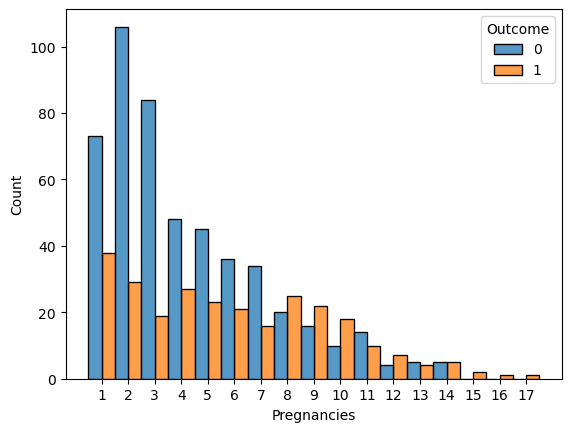

In [8]:
sns.histplot(pima,x = "Pregnancies",binwidth=1,hue = "Outcome",multiple="dodge")
plt.xticks(np.arange(1,18)-0.5,labels = range(1,18))
plt.show()

In [9]:
#Split the data into the predictors and Outcome Variable 

diabetes = pima['Outcome']
predictors = pima[cols[1:8]]

## Correlations among predictors

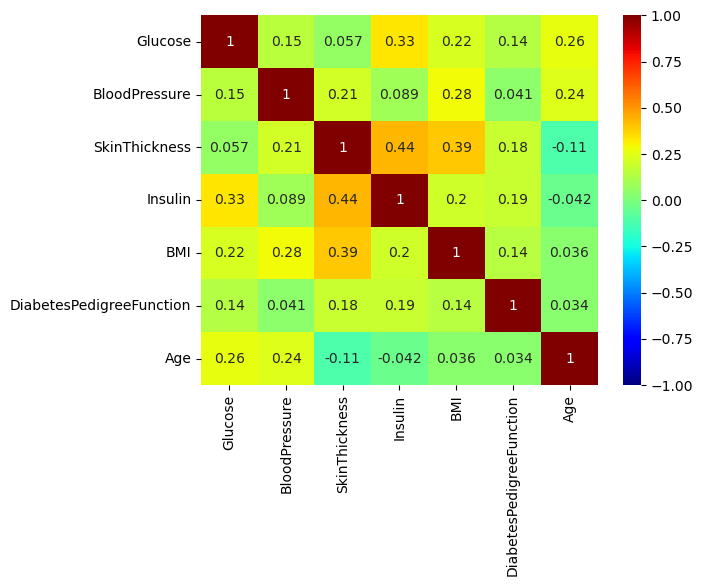

In [10]:
sns.heatmap(predictors.corr(), vmin=-1, vmax=1, cmap= "jet",annot=True)
plt.show()

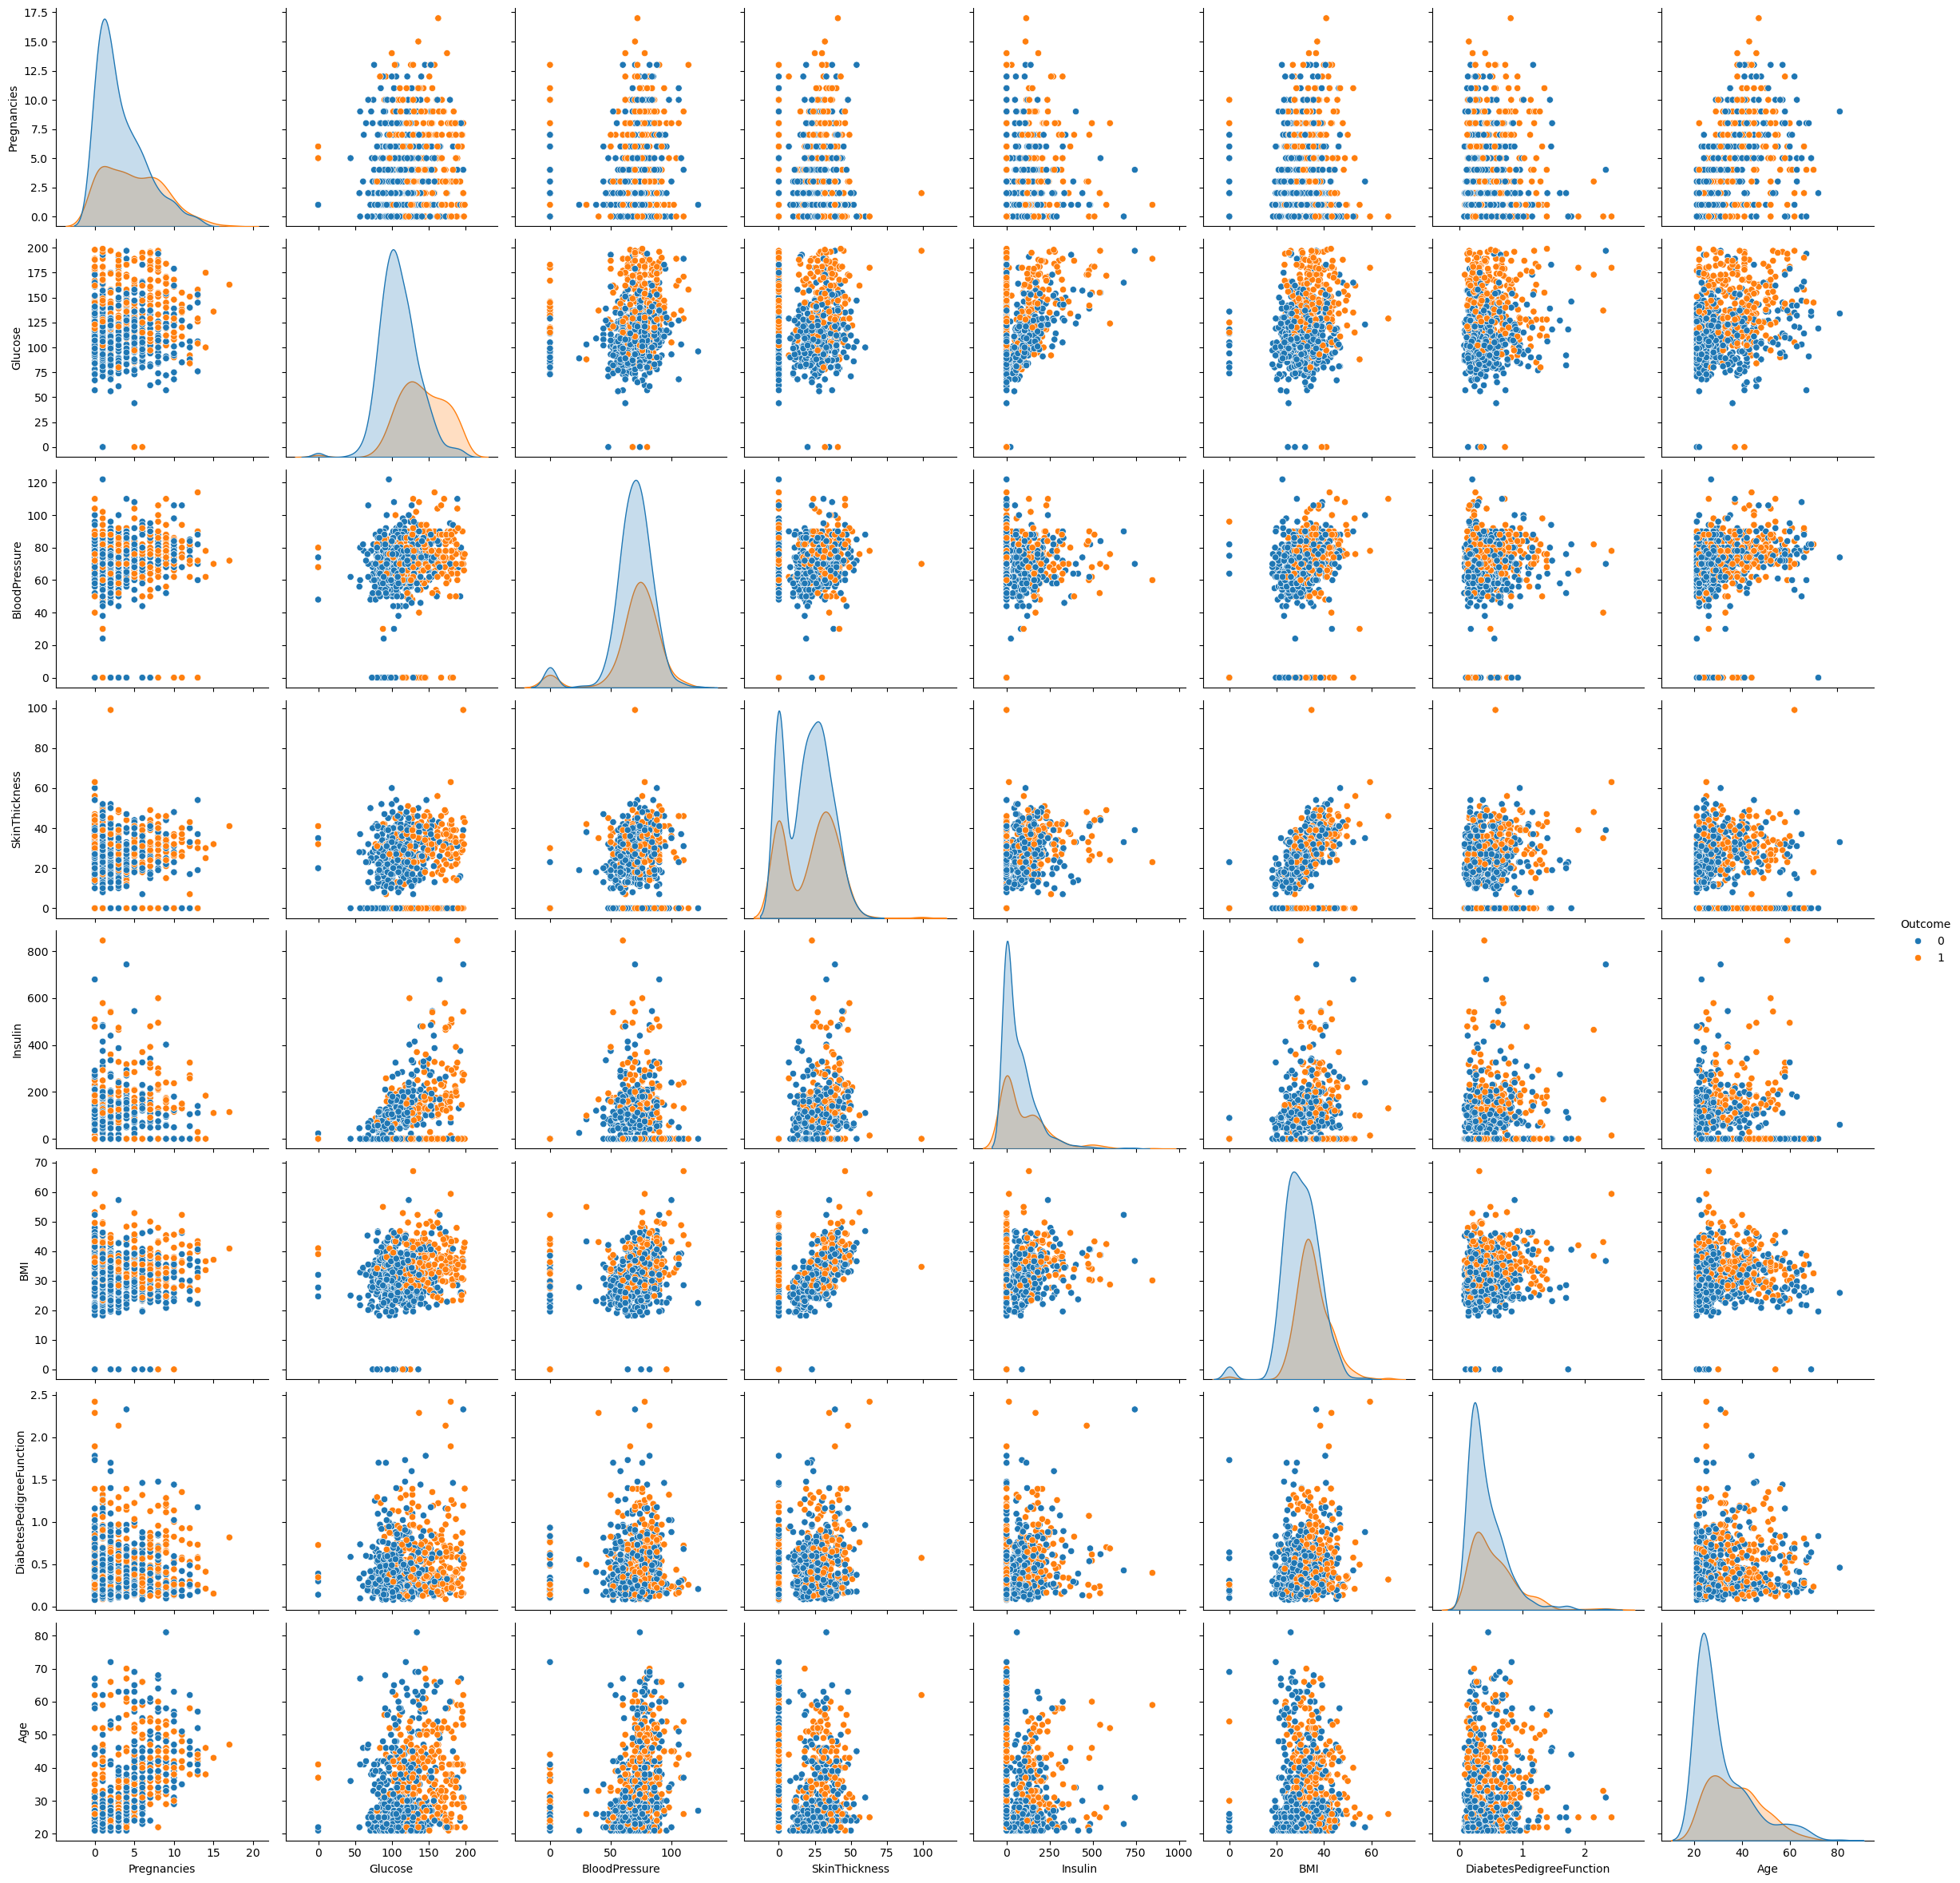

In [11]:
sns.pairplot(pima, hue="Outcome", height=3);

## Training and test sets
* Here I made the decision to make the test size 25% of the data and training 75%
* 
 
#predictors_train has the training data features 
#predictors_test has the testing data features
#diabetes_train has the training data outcomes (targets)
#diabetes_test has the testing data outcomes (targets)

In [12]:

from sklearn.model_selection import train_test_split

predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors, diabetes, test_size=0.25,random_state=16)

In [13]:
diabetes.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
diabetes_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [15]:
diabetes_test.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [16]:
# instantiate the model (using the default parameters, except random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(predictors_train, diabetes_train)

diabetes_pred = logreg.predict(predictors_test)

In [17]:
print(diabetes_pred)

[1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 1 1]


In [18]:
#Lets see if the predictions match the expected outcomes 
correct = (diabetes_pred==diabetes_test)
ncorrect = np.sum(correct)
pctcorrect = 100*ncorrect/len(diabetes_test)
print(pctcorrect)

79.16666666666667


## Confusion Matrix 

A confusion matrix is a really nice way to summarize the performance of a classifer. 

In [19]:
cnf_matrix = metrics.confusion_matrix(diabetes_test, diabetes_pred)
print(cnf_matrix)

[[113  12]
 [ 28  39]]


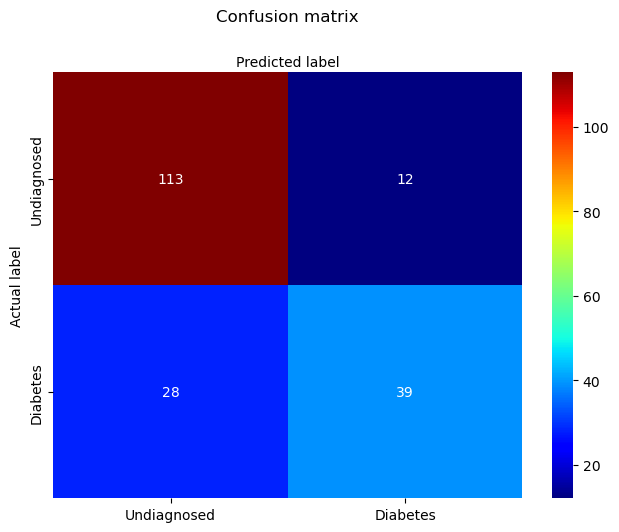

In [20]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

#Text(0.5,257.44,'Predicted label');

In [21]:
## you can also get this report 
print(metrics.classification_report(diabetes_test,diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.80      0.90      0.85       125
    Diabetes       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



### Precision - What proportion of postive identifications were actually correct
  $$ Precision = \frac{TP}{TP+FP}$$ 
* TP = True Positive
* FP = False Positive
* TN - True Negative 
* FN - False Negative  
* Recall - What proportion of actual positive was identified correctly? 
  $$ Recall = \frac{TP}{TP+FN}$$




## Diagnostic Information 

* The strength of linear methods like logistic regression is that they can provide rich insight into the performance of the model. 
 

In [22]:
diabetes_pprob = logreg.predict_proba(predictors_test)

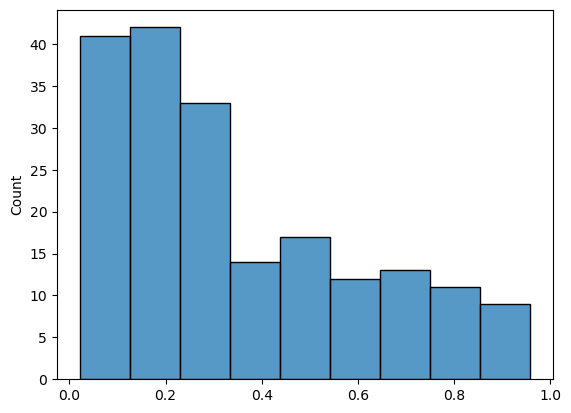

In [23]:
sns.histplot(diabetes_pprob[:,1])
plt.show()

The prediction probability is a confidence estimate on the prediction.  

![](../images/PrecisionVsRecallBase.png)

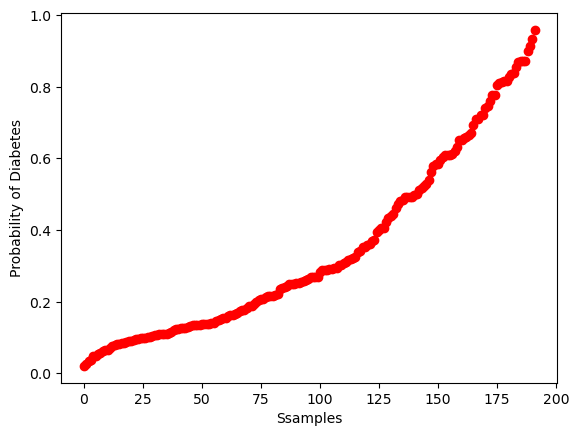

In [24]:
plt.plot(np.sort(diabetes_pprob[:,1]),'ro')
plt.xlabel('Ssamples')
plt.ylabel('Probability of Diabetes')
plt.show()

## ROC Curve 
* Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
* An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate (TPR) is the same as recall in metrics and is therefore defined as follows:

$$TPR = \frac{TP}{TP+FN}$$

* False Positive Rate (FPR) is defined as follows:

$$FPR = \frac{FP}{FP+TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives

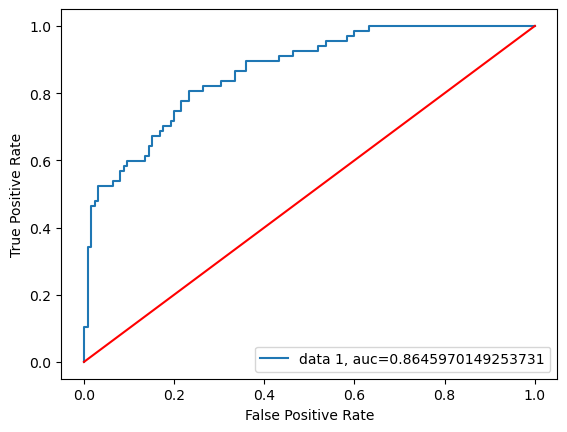

In [25]:
fpr, tpr, _ = metrics.roc_curve(diabetes_test,  diabetes_pprob[:,1])
auc = metrics.roc_auc_score(diabetes_test, diabetes_pprob[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

* The actual choice of threshold is somewhat arbitrary and depends on the importance of TPR and FPR for your classification problem. Typically, if there is no external concern (like death!), one option is to maximize TPR-FPR.  

* We can also (potentially) learn from these models which features were most useful in making the prediction by examining the coefficients of the model. 

In [26]:
model = pd.DataFrame(logreg.coef_,columns = cols[1:8])

In [27]:
model.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.032098,-0.014286,0.0038,-0.001688,0.087405,0.765038,0.027724


* The logistic regression model can be written as: 

$$\hat{p}= \dfrac{e^{w^T x}}{1+e^{w^T x}}$$

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}}$$

where w are the weights that we can return and x are out features

The decision boundaries are exactly at the position where the two classes are equiprobable. The boundary decision probability is exactly 0.5. Solving our sigmoid function for $p=0.5$:

$$\hat{p}= \dfrac{1}{1+e^{-w^T x}} = 0.5 =  \dfrac{1}{1+1} $$

$$ e^{-w^T x} = 1$$

$$ -w^T x = 0$$

$$ w^T x = 0$$
 

In [43]:
#make the test train split.  
predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors, diabetes, test_size=0.25, random_state=16)

In [29]:
#this preprocessing step is the first thing to do after test train split 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #This initializes the StandardScaler 
ss.fit(predictors_train)
predictors_train = pd.DataFrame(ss.transform(predictors_train), columns = predictors.columns)
predictors_test = pd.DataFrame(ss.transform(predictors_test),columns = predictors.columns)

In [30]:
predictors_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.656862,1.078080,0.180175,3.466873,-0.218580,-1.048824,0.888971
1,-0.661653,0.355957,-0.378789,-0.260537,-1.111064,-0.758376,-1.046270
2,0.135589,-0.469326,-0.068253,0.512748,0.202871,-1.171117,-0.166615
3,2.282010,0.046476,-1.310396,-0.703656,-0.156602,-0.437354,-0.166615
4,0.043599,-0.263005,0.677033,0.651766,0.364013,0.675520,-0.254581


In [51]:
# instantiate the model (using the default parameters, except random_state and max_iter)
logreg = LogisticRegression(random_state=16,max_iter = 5000)

# fit the model with data
logreg.fit(predictors_train, diabetes_train)
diabetes_pred = logreg.predict(predictors_test)
accuracy_logreg = metrics.accuracy_score(diabetes_test,diabetes_pred)
cnf_logreg = metrics.confusion_matrix(diabetes_test, diabetes_pred)
class_report_logreg= metrics.classification_report(diabetes_test,diabetes_pred)

Accuracy and Confusion Matrix

In [ ]:
print('Accuracy Logistic Regression: ', accuracy_logreg)

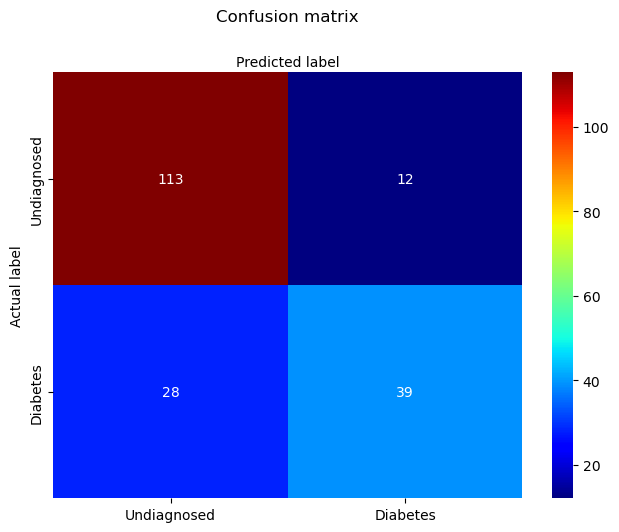

In [52]:
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_logreg), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()


In [32]:
print(metrics.classification_report(diabetes_test,diabetes_pred,target_names=class_names))


              precision    recall  f1-score   support

 Undiagnosed       0.80      0.90      0.85       125
    Diabetes       0.76      0.58      0.66        67

    accuracy                           0.79       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.79      0.79      0.78       192



ROC Curve

In [57]:
pprob_logreg = logreg.predict_proba(predictors_test)
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(diabetes_test,  pprob_logreg[:,1])
auc_logreg = metrics.roc_auc_score(diabetes_test, pprob_logreg[:,1])

Text(0, 0.5, 'True Positive Rate')

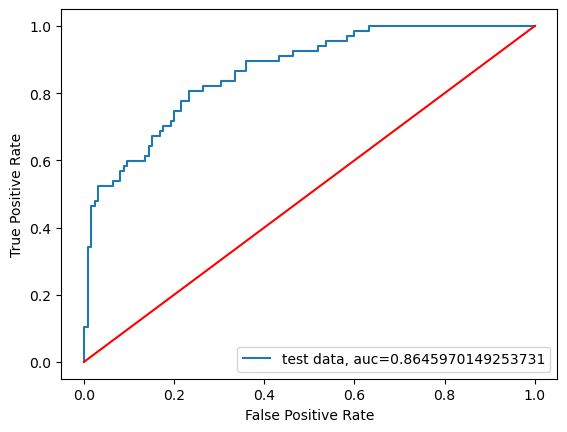

In [58]:
plt.plot(fpr_logreg,tpr_logreg,label="test data, auc="+str(auc_logreg))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

*Now I can examine the coefficients.  

In [59]:
model = pd.DataFrame(lda.coef_,columns = cols[1:8])

In [60]:
model.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.079203,-0.292305,0.06307,-0.183478,0.637783,0.250042,0.339212


In [35]:


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

Linear Discriminant Analysis 

In [67]:
#make the LDA object
lda = LinearDiscriminantAnalysis()
#fit the model
lda.fit(predictors_train, diabetes_train)
#make some predictions 
pred_lda = lda.predict(predictors_test)
#compute accuracy 
accuracy_lda = metrics.accuracy_score(diabetes_test,diabetes_pred)
#get a confusion matrix 
cnf_lda = metrics.confusion_matrix(diabetes_test,diabetes_pred)
#get a classification report 
classreport_lda = metrics.classification_report(diabetes_test,diabetes_pred,target_names=class_names)
#get some prediction probabilities 
pprob_lda= lda.predict_proba(predictors_test)
#get an ROC curve 
fpr_lda, tpr_lda, _ = metrics.roc_curve(diabetes_test,  pprob_lda[:,1])
auc_lda = metrics.roc_auc_score(diabetes_test, pprob_lda[:,1])


In [42]:
#examine the accuracy and confusion matrix 
print('LDA accuracy: ',accuracy_lda)
print(classreport_lda)

LDA accuracy:  0.796875
              precision    recall  f1-score   support

 Undiagnosed       0.80      0.91      0.85       125
    Diabetes       0.78      0.58      0.67        67

    accuracy                           0.80       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



Examine the Confusion matrix

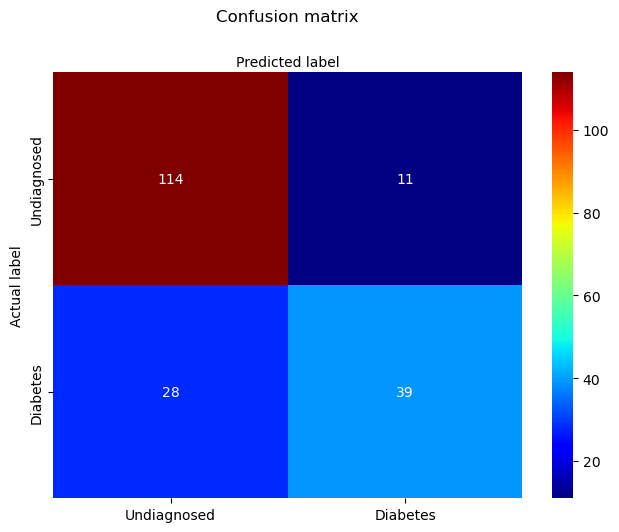

In [53]:
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_lda), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()


ROC curve

Text(0, 0.5, 'True Positive Rate')

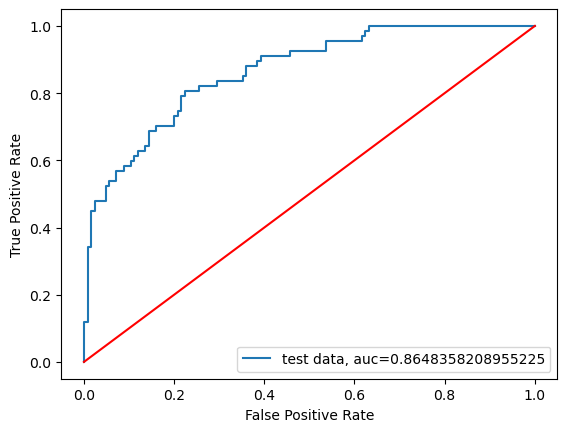

In [68]:
plt.plot(fpr_lda,tpr_lda,label="test data, auc="+str(auc_lda))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Examine model coefficients 

In [62]:
model = pd.DataFrame(lda.coef_,columns = cols[1:8])

In [63]:
model.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.079203,-0.292305,0.06307,-0.183478,0.637783,0.250042,0.339212


Naive Bayes

In [65]:
NB = GaussianNB()
NB.fit(predictors_train, diabetes_train)

GaussianNB()

Lets get the p(Y=k)

In [66]:
print(NB.classes_)
print(NB.class_prior_)

array([0.65104167, 0.34895833])

In [69]:
pred_NB = NB.predict(predictors_test)
#compute accuracy 
accuracy_NB = metrics.accuracy_score(diabetes_test,pred_NB)
#get a confusion matrix 
cnf_NB = metrics.confusion_matrix(diabetes_test,pred_NB)
#get a classification report 
classreport_NB = metrics.classification_report(diabetes_test,pred_NB,target_names=class_names)
#get some prediction probabilities 
pprob_NB= NB.predict_proba(predictors_test)
#get an ROC curve 
fpr_NB, tpr_NB, _ = metrics.roc_curve(diabetes_test,  pprob_NB[:,1])
auc_NB = metrics.roc_auc_score(diabetes_test, pprob_NB[:,1])


In [71]:
print(auc_NB)

0.8597014925373134


In [74]:
print(cnf_NB)

[[113  12]
 [ 28  39]]
